In [1]:
import random
import itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math

In [8]:
minGridSideSize = 100

minRowColSize = 0.8
maxRowColSize = 10

horizontalProbability = 0.5
thickRectangleProbability = 0.1
thickRectangleMaxGridNum = 4

numRectangles = 30

generations = 9
generationShape = (3, 3)

In [5]:
def ValidateGrid(probeCoordinates, numProbeCoordinates):
    # This function explores the current generated grid starting from each of the probe coordinates and regenerates the "rectangles" variable from that probe
    validatedRectangles = []
    for i in range(numRows):
        validatedRectangles.append([])
        for j in range(numCols):
            validatedRectangles[i].append(False)

    for pc in range(numProbeCoordinates):
        probeCoordinate = probeCoordinates[pc]

        # First we find the row and column that match these probe coordinates
        currentSize = 0
        probeRow = 0
        for j in range(numRows):
            currentSize += rows[i]
            if currentSize >= probeCoordinate[0]:
                probeRow = i
                break
        
        currentSize = 0
        probeCol = 0
        for i in range(numCols):
            currentSize += columns[i]
            if currentSize >= probeCoordinate[1]:
                probeCol = i
                break

        # Next we start exploring
        toExplore = []
        toExplore.append([probeRow, probeCol])
        numToExplore = 1
        alreadyExplored = []
        numExplored = 0
        while numToExplore > numExplored:
            currentlyExploring = toExplore[numExplored]
            alreadyExplored.append(currentlyExploring)
            numExplored += 1

            if (currentlyExploring[0] < 0 or
                currentlyExploring[1] < 0 or
                currentlyExploring[0] >= numRows or
                currentlyExploring[1] >= numCols or
                not paintedRectangles[currentlyExploring[0]][currentlyExploring[1]]) :
                # The coordinates we are currently exploring are a wall/unexplorable
                continue
            
            validatedRectangles[currentlyExploring[0]][currentlyExploring[1]] = True

            # For each of the coordinates N, S, E, and W of the one we're currently exploring, we check whether they've already been explored and if not we add them to our "toExplore" list

            if (currentlyExploring[0] < numRows - 1):
                candidateCoordinate = [currentlyExploring[0] + 1, currentlyExploring[1]]
                candidateAlreadyExplored = False
                for i in range(numExplored):
                    if (alreadyExplored[i][0] == candidateCoordinate[0] and alreadyExplored[i][1] == candidateCoordinate[1]):
                        candidateAlreadyExplored = True
                        break
                        
                if (not candidateAlreadyExplored):
                    toExplore[numToExplore] = candidateCoordinate
                    numToExplore += 1

            if (currentlyExploring[0] > 0):
                candidateCoordinate = [currentlyExploring[0] - 1, currentlyExploring[1]]
                candidateAlreadyExplored = False
                for i in range(numExplored):
                    if (alreadyExplored[i][0] == candidateCoordinate[0] and alreadyExplored[i][1] == candidateCoordinate[1]):
                        candidateAlreadyExplored = True
                        break
                        
                if (not candidateAlreadyExplored):
                    toExplore[numToExplore] = candidateCoordinate
                    numToExplore += 1

            if (currentlyExploring[1] < numCols - 1):
                candidateCoordinate = [currentlyExploring[0], currentlyExploring[1] + 1]
                candidateAlreadyExplored = False
                for i in range(numExplored):
                    if (alreadyExplored[i][0] == candidateCoordinate[0] and alreadyExplored[i][1] == candidateCoordinate[1]):
                        candidateAlreadyExplored = True
                        break
                        
                if (not candidateAlreadyExplored):
                    toExplore[numToExplore] = candidateCoordinate
                    numToExplore += 1

            if (currentlyExploring[1] > 0):
                candidateCoordinate = [currentlyExploring[0], currentlyExploring[1] - 1]
                candidateAlreadyExplored = False
                for i in range(numExplored):
                    if (alreadyExplored[i][0] == candidateCoordinate[0] and alreadyExplored[i][1] == candidateCoordinate[1]):
                        candidateAlreadyExplored = True
                        break
                        
                if (not candidateAlreadyExplored):
                    toExplore[numToExplore] = candidateCoordinate
                    numToExplore += 1

    paintedRectangles = validatedRectangles


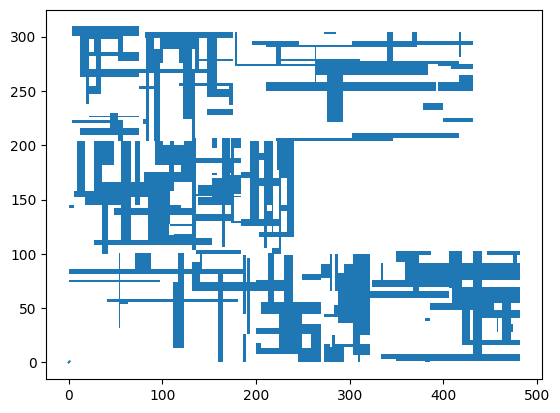

In [9]:
fig, ax = plt.subplots()
ax.plot([0, 1],[0, 1])

currentGen = [0, 0]
startPlotX = 0
startPlotY = 0
minMaxYSize = minGridSideSize + maxRowColSize + 1
for g in range(generations):
    columns = []
    rows = []

    xSize = 0
    while xSize < minGridSideSize:
        newColSize = minRowColSize + random.random() * (maxRowColSize - minRowColSize)
        # newColSize = random.lognormvariate(math.log(4), 0.5)
        xSize += newColSize
        columns.append(newColSize)
    numCols = len(columns)

    ySize = 0
    while ySize < minGridSideSize:
        newRowSize = minRowColSize + random.random() * (maxRowColSize - minRowColSize)
        # newRowSize = random.lognormvariate(math.log(4), 0.5)
        ySize += newColSize
        rows.append(newRowSize)
    numRows = len(rows)

    # ---

    paintedRectangles = []
    for r in range(numRectangles):
        if random.random() < thickRectangleProbability:
            if random.random() < horizontalProbability:
                rectangleSize = [random.randint(2, thickRectangleMaxGridNum), random.randint(1, numCols)]
            else:
                rectangleSize = [random.randint(1, numRows), random.randint(2, thickRectangleMaxGridNum)]
        elif random.random() < horizontalProbability:
            rectangleSize = [1, random.randint(1, numCols)]
        else:
            rectangleSize = [random.randint(1, numRows), 1]
        
        startingCoordinates = [random.randint(1, numRows), random.randint(1, numCols)]
        for i in range(rectangleSize[0]):
            if startingCoordinates[0] + i > numRows:
                break

            for j in range(rectangleSize[1]):
                if startingCoordinates[1] + j > numCols:
                    break

                paintedRectangles.append([startingCoordinates[0] + i, startingCoordinates[1] + j])

    paintedRectangles.sort()
    paintedRectangles = list(k for k,_ in itertools.groupby(paintedRectangles))

    # ---

    # ValidateGrid([[50, 50]], 1)

    # ---

    maxXSize = 0
    maxYSize = 0
    for r in paintedRectangles:
        ax.add_patch(Rectangle((sum(rows[0:(r[0] - 1)]) + startPlotX, sum(columns[0:(r[1] - 1)]) + startPlotY), rows[r[0] - 1], columns[r[1] - 1]))
        maxXSize = max(maxXSize, sum(rows[0:(r[0] - 1)]) + rows[r[0] - 1])
        maxYSize = max(maxYSize, sum(columns[0:(r[1] - 1)]) + columns[r[1] - 1])
    
    currentGen[0] += 1
    startPlotX += maxXSize
    minMaxYSize = min(minMaxYSize, maxYSize)
    if currentGen[0] >= generationShape[0]:
        currentGen[0] = 0
        startPlotX = 0
        currentGen[1] += 1
        startPlotY += minMaxYSize
        minMaxYSize = minGridSideSize + maxRowColSize + 1
        if currentGen[1] >= generationShape[1]:
            break

plt.show()